# TPC3 - Modelo de Ising de dimensão infinita com anisotropia

*  Não deve escrever o seu nome nem nenhum código identificador em nenhum
sítio. 
* Deve entregar ESTE Notebook de Jupyter.
* O trabalho é individual. Podem e devem haver discussões com colegas
mas o resultado entregue é individual. 
* Não deve acrescentar ou apagar nenhuma célula.
* Todas as explicações devem ser claras e concisas. 
* É preferível fazer menos e fazer bem que muito e mal. 
* A não verificação de alguma destas regras leva ao anulamento e exclusão
da prova.

In [33]:
# Importe os Módulos Necessários
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

## Pergunta 1
Nas aulas discutimos a solução do modelo de Ising de campo médio com
$N$ spins ($s=\pm1/2$). Neste trabalho de casa vamos abordar o modelo
de Ising de campo médio de spin um ($s_{i}=\pm1,0$) com anisotropia.
Considere o Hamiltoniano, 
\begin{equation}
H(M,N_0,N)=\frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{N}\left(1-s_{i}s_{j}\right)+D\sum_{i=1}^{N}s_{i}^{2}=\frac{N^{2}-M^{2}}{N}+D(N-N_{0})
\end{equation}
onde a magnetização é dada por $M=\sum_{i=1}^{N}s_{i}$ e as variáveis
de spin $s_{i}$ são $\{\pm1\}$. Para este modelo a energia é função
apenas da magnetização e do número de partículas. A densidade de estados
do sistema é obtida usando o número de spins $s_{i}=+1$ ($N_{+}$),
o número de spins $s_{i}=-1$ ($N_{-}$) e o número de spins $s_{i}=0$
($N_{0}$): 
\begin{align*}
\Omega(N_{+},N_{-},N_{0}) & =\frac{N!}{N_{+}!N_{-}!N_{0}!} & N_{+} & =\frac{N-N_{0}+M}{2} & N_{-} & =\frac{N-N_{0}-M}{2}
\end{align*}
Com esta parametrização,
\begin{equation}
\Omega(M,N_{0},N)=\frac{N!}{\left(\frac{N-N_{0}+M}{2}\right)!\left(\frac{N-N_{0}-M}{2}\right)!N_{0}!}
\end{equation}
onde $M\in\{-(N-N_{0}),-(N-N_{0})+2,\dots,(N-N_{0})-2,(N-N_{0})\}$,
$N_{0}\in\{0,\dots,N\}$.

1. Calcule numericamente o valor médio exacto como função da temperatura
do módulo da magnetização para $\beta$ entre 0.1 e 1.5 e para valores
de $D\in\{0.0,0.25,0.5,0.75,1\}$
\begin{align*}
\left\langle \frac{|M|}{N}\right\rangle  & =\sum_{M,N_{0}}\frac{|M|}{N}\Omega(M,N_{0},N)\frac{e^{-\beta H(M,N_{0},N)}}{Z(\beta)}\\
Z(\beta) & =\sum_{M,N_{0}}\Omega(M,N_{0},N)e^{-\beta H(M,N_{0},N)}
\end{align*}
Sugestão: O cálculo da combinatórica envolve números muito grandes.
O idela é usar a fórmula de Stirling,
\begin{equation}
\log(n!)=n\log(n)-n+\frac{1}{2}\log(2\pi n)
\end{equation}
e notar que o valor médio fica inalterado se deslocar a energia $-\beta H(M,N_{0},N)\to-\beta H(M,N_{0},N)-C$
nas exponenciais. 

## Alínea 1

Vamos verificar que o valor médio fica inalterado pela translação da energia sugerida:
$$
\begin{align*}
\left\langle \frac{|M|}{N}\right\rangle  &= \sum_{M,N_{0}}\frac{|M|}{N}\Omega_N(M,N_{0})\frac{e^{-\beta H(M,N_{0},N)}}{\sum_{M,N_{0}}\Omega_N(M,N_{0})e^{-\beta H(M,N_{0},N)}}
\\[0.2cm]
&= \sum_{M,N_{0}}\frac{|M|}{N}\Omega_N(M,N_{0})\frac{e^{-\beta H(M,N_{0},N)-C}}{\sum_{M,N_{0}}\Omega_N(M,N_{0})e^{-\beta H(M,N_{0},N)-C}}
\end{align*}
$$

Podemos então escolher um bom valor para $C$ estudando o Hamiltoniano em jogo:
$$
\begin{align*}
H_N(M,N_0) &= \frac{N^{2}-M^{2}}{N}+D(N-N_{0})
\\[0.2cm]
&= N + DN - DN_0 - \frac{M^2}{N}
\end{align*}
$$

Escolhendo $C = -\beta(N + DN)$ temos:
$$
\begin{align*}
-\beta H_N(M,N_0) - C&= \beta\left(DN_0 + \frac{M^2}{N}\right)
\end{align*}
$$

## Análise dos Resultados
Começando pelos aspetos computacionais:
- Decidiu-se calcular o fatorial usando o seu valor exato, uma vez que isto não diminui a velocidade do programa, graças à memoização dos resultados.
- Calculou-se o valor médio para vários valores de $N$ de modo a avaliar quão grande deviamos escolher este parâmetro, verificando-se que os resultados obtidos para $N = 100$ e $N = 150$ são muito semelhantes, pelo que se irá usar $N = 100$.

Os resultados da simulação podem ser interpretados fisicamente do seguinte modo:
- Para $D$ fixo, temos que a um maior $\beta$ corresponde maior magnetização média. Ou seja, a uma temperatura menor os spins têm maior tendência a alinhar-se, especialmente para $D$ pequeno. Isto faz sentido intuitivo, correspondendo à ideia de que para uma temperatura maior os spins vão ter maior movimento aleatório, logo irão ter menor tendência de se alinhar, resultando numa magnetização menor.
- Para $\beta$ fixo temos que a um maior $D$ corresponde maior magnetização, o que faz sentido pois o termo associado a $D$ é a energia correspondente à auto-interação dos spins. Logo, se $D$ for maior a energia será muito maior se houver vários spins não nulos!
    Noutra perspetiva, o primeiro termo (o termo de interação) é menor caso os spins estejam alinhados, sendo este efeito apenas dominante para $D$ pequeno.

- Para temperaturas maiores, o valor de $\beta$ é menor e a magnetização tende para um valor médio independente de $D$. Isto acontece pois para $T$ elevado temos menor distinção entre valores de energia, logo, no cálculo de $\lang |M|/N\rang$ apenas interessa o número de configurações $\Omega_N(M, N_0)$ associadas a cada magnetização (como podemos perceber considerando o limite $\beta \to 0$ na expressão acima).

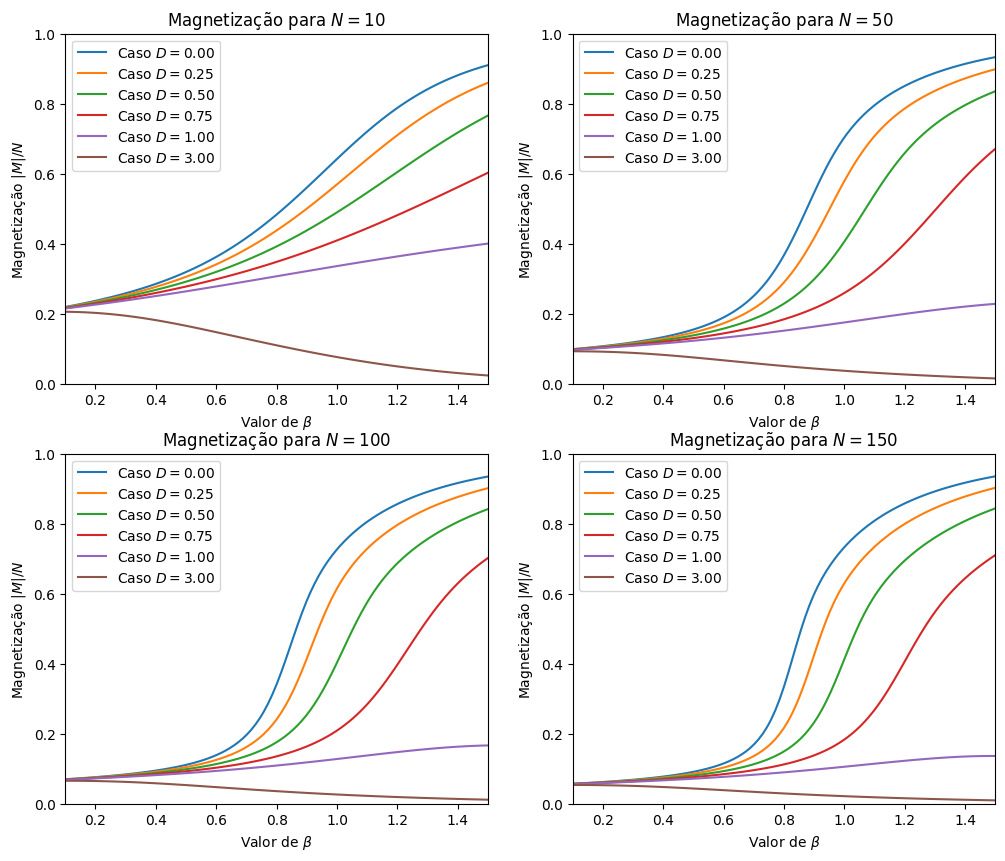

In [34]:
# Parâmetro abaixo do qual não usamos a aproximação de Stirling
STIRLING = 10

# Memorizar o valor do fatorial para n baixo
memfactorial = [1]
for n in range(STIRLING):
    memfactorial += [memfactorial[-1] * (n+1)]


def stirlingfactorial(n: int) -> int:
    """
        Calcula o fatorial dos elementos de `n`. Usa a aproximação de Stirling para inteiros maiores que o parâmetro STIRLING.
    """
    # Aceder às variáveis globais
    global STIRLING, memfactorial

    if n <= STIRLING:
        return memfactorial[n]
    else:
        return n * np.log(n) - n + np.log(2 * np.pi * n) /2


def exactfactorial(n: int) -> int:
    """
        Calcula o fatorial de modo exato usando memoização
    """
    global memfactorial

    numfactorial = len(memfactorial)
    if numfactorial <= n:
        steps = n - numfactorial + 1
        for i in range(steps):
            memfactorial += [memfactorial[-1] * (i + numfactorial)]
    return memfactorial[n]


# PROGRAMA PRINCIPAL

# Parâmetros
Ne = 100 # N escolhido
P = 101 # Pontos para beta
betamin = 0.1 # Valor mínimo de beta
betamax = 1.5 # Valor máximo de beta
bb12 = np.array([0.1, 0.5, 0.75, 0.9, 1.0, 1.05, 1.1, 1.2, 1.5]) # Valores de beta do exercício 1.2

# Valores de beta a usar neste exercício
bb11 = np.sort(np.array(list(set(np.linspace(betamin, betamax, P)).union(set(bb12)))))
P = len(bb11)


cols = 2
rows = 2
plt.figure(figsize=(6 * cols, 5 * rows))

# Calcular para vários N
dados11 = dict()
for pos, N in enumerate([10, 50, Ne, 150]):
    Nfac = exactfactorial(N)
    plt.subplot(rows, cols, pos+1)

    # Calcular para cada D
    for D in [0, 0.25, 0.5, 0.75, 1, 3]:
        # Função partição
        Z = np.zeros(P, dtype="float64")

        # Resultado
        res = np.zeros(P, dtype="float64")

        # Fazer o somatório para cada N0 e M
        for N0 in range(N+1):
            Mmax = N-N0
            N0fac = exactfactorial(N0)
            for M in range(-Mmax, Mmax + 1, 2):
                # Calcular omega, notando que deve ser sempre um inteiro!
                omega = Nfac // (exactfactorial(int((Mmax+M)/2)) * exactfactorial(int((Mmax-M)/2)) * N0fac)
        
                # Calcular para cada beta
                exp = np.exp(bb11 * (D * N0 + M**2/N - N/2))

                # Calcular os valores desejados (foi necessário especificar o tipo de dado do array, às vezes o tipo de dado era convertido para object)
                omegaexp = np.array(omega * exp, dtype=np.float64)
                Z += omegaexp
                res += abs(M) * omegaexp
        
        # Calcular a magnetização
        mag = (res/Z)/N

        # Representar graficamente
        plt.plot(bb11, mag, label=f"Caso $D = {D:.2f}$")
        if N == Ne:
            dados11[D] = (Z, mag)

    plt.title(f"Magnetização para $N = {N}$")
    plt.xlabel("Valor de $\\beta$")
    plt.ylabel("Magnetização $|M|/N$")
    plt.legend()

    ax = plt.gca()
    ax.set_xlim(betamin, betamax)
    ax.set_ylim(0, 1)

plt.show()

1. Para cada temperatura a distribuição de probabilidades da magnetização
é dada por,
\begin{equation}
P_{N,\beta}(M,N_{0})=\frac{e^{\ln(\Omega(M,N_{0},N))-\beta H(M,N_{0},N)}}{Z(\beta,N)}
\end{equation}
e a distribuição de probabilidade da magnetização é dada por, 
\begin{equation}
P_{N,\beta}(M)=\sum_{N_{0}}P_{N,\beta}(M,N_{0})
\end{equation}
Gere uma amostra de valores aleatórios de $M$ e $N_{0}$ com a distribução
pretendida usando o método von Neumann. Com esta amostra $\{M_{1},M_{2},\dots,M_{K}\}$

$\qquad$ a) Represente o histograma da amostra aleatória gerada e compare com
a distribuição teórica para $\beta\in\{0.1,0.5,0.75,0.9,1.0,1.05,1.1,1.2,1.5\}$
e $D\in\{0.0,0.25,0.5,0.75,1\}$.

## Alínea 2 a)

Usamos um método semalhante ao acima para calcular $P_{N, \beta}(M)$.

## Análise dos Resultados
Conseguimos gerar os valores pretendidos, observando que:
- Para $\beta$ muito baixo temos apenas um pico em $M = 0$, sendo este semelhante para os vários valores de $D$
- Para $D = 1$ temos apenas um pico para a magnetização em $M = 0$

Ambos estes factos são os esperados dado o raciocínio da alínea anterior.

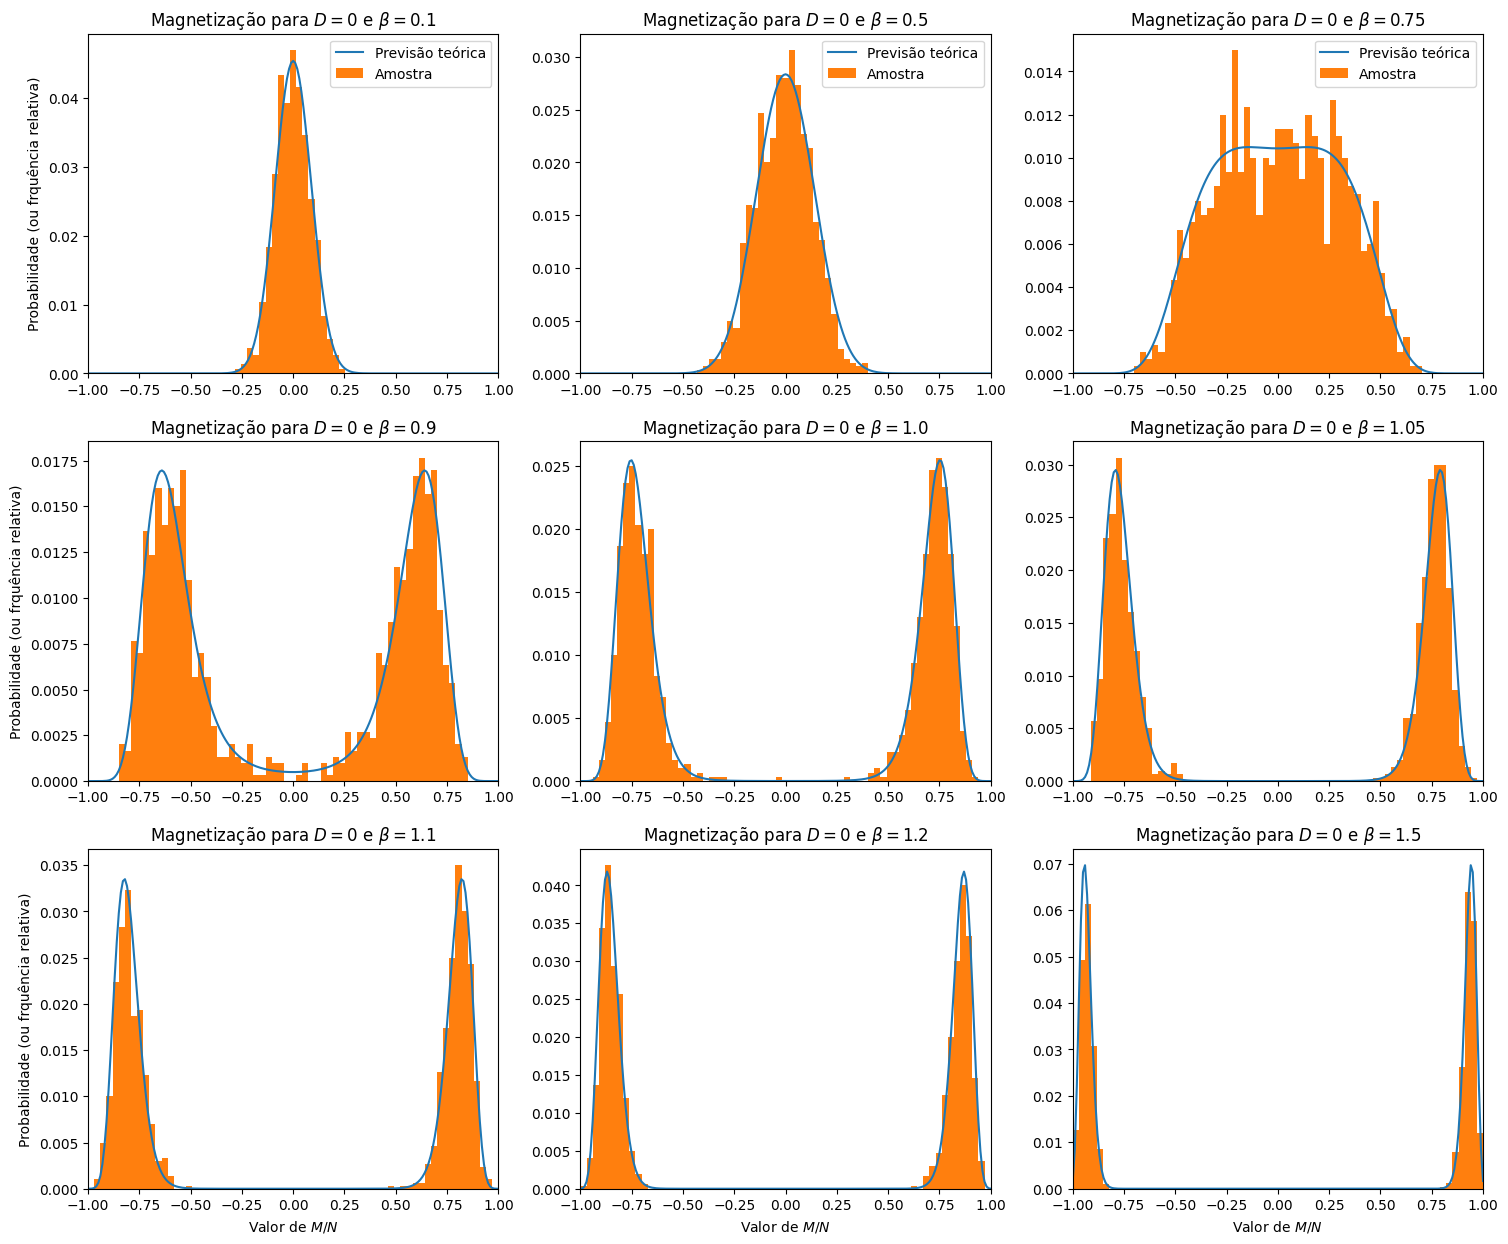

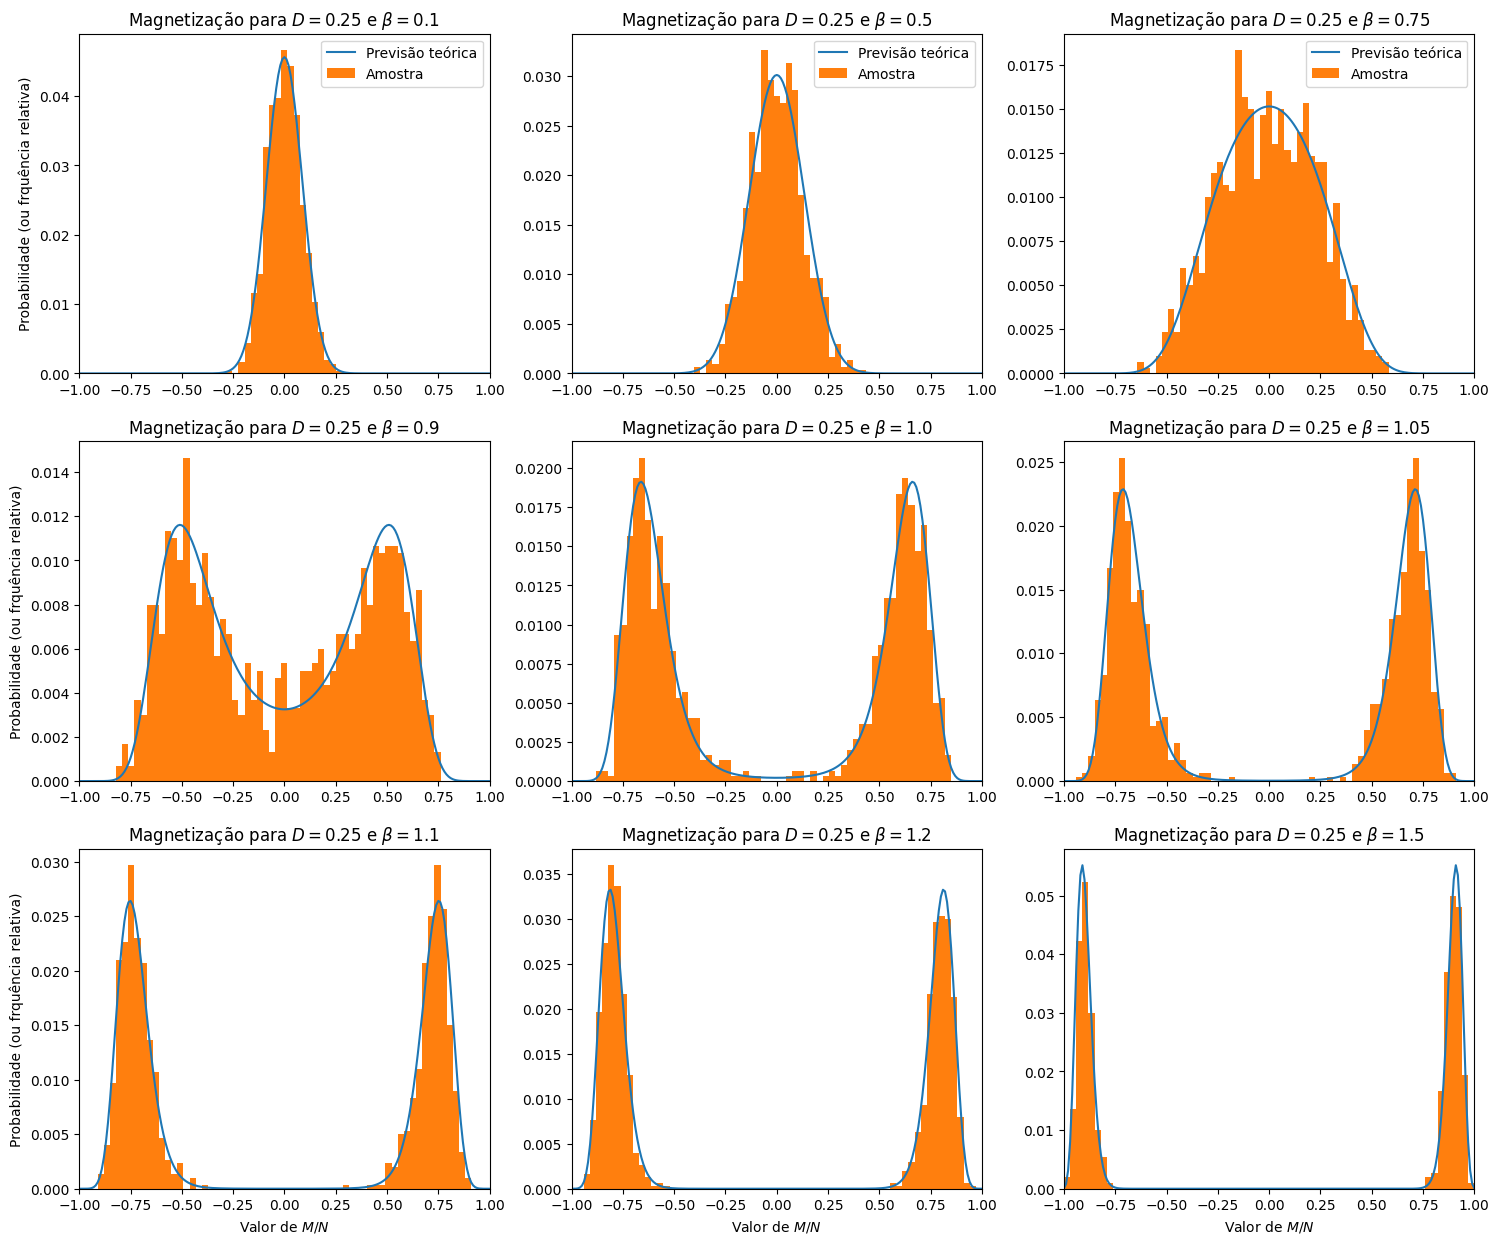

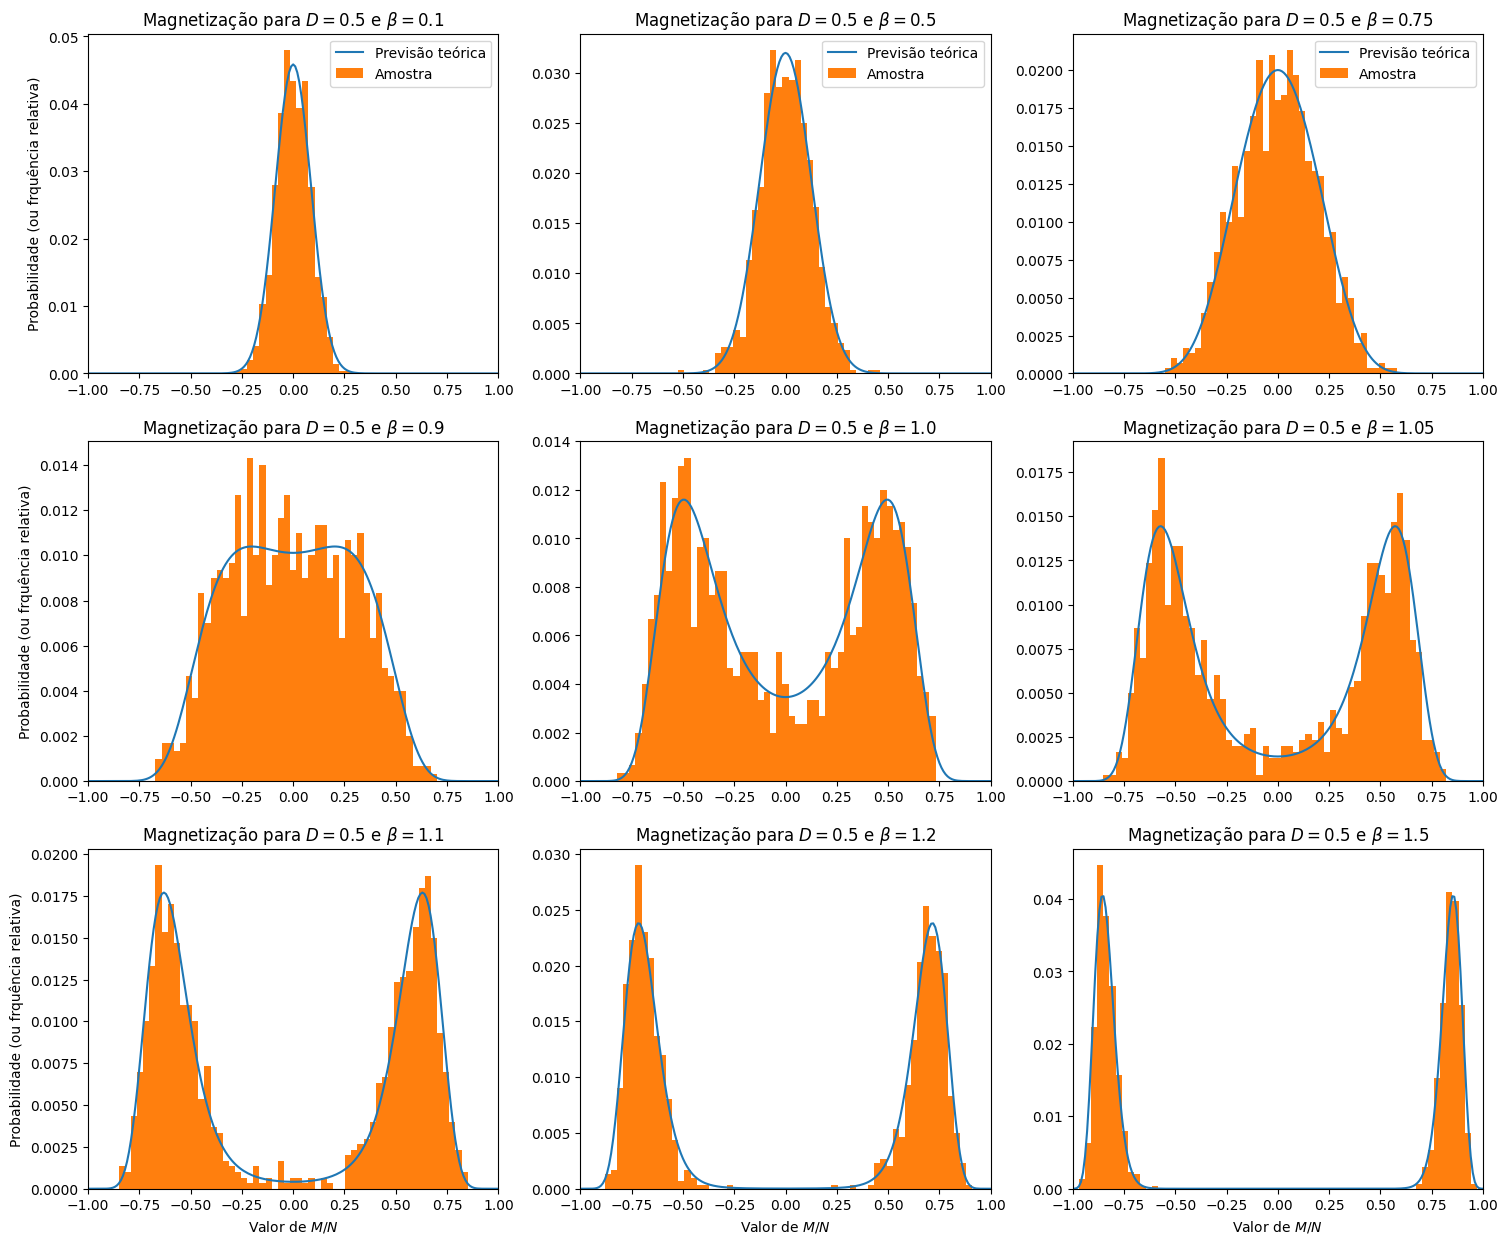

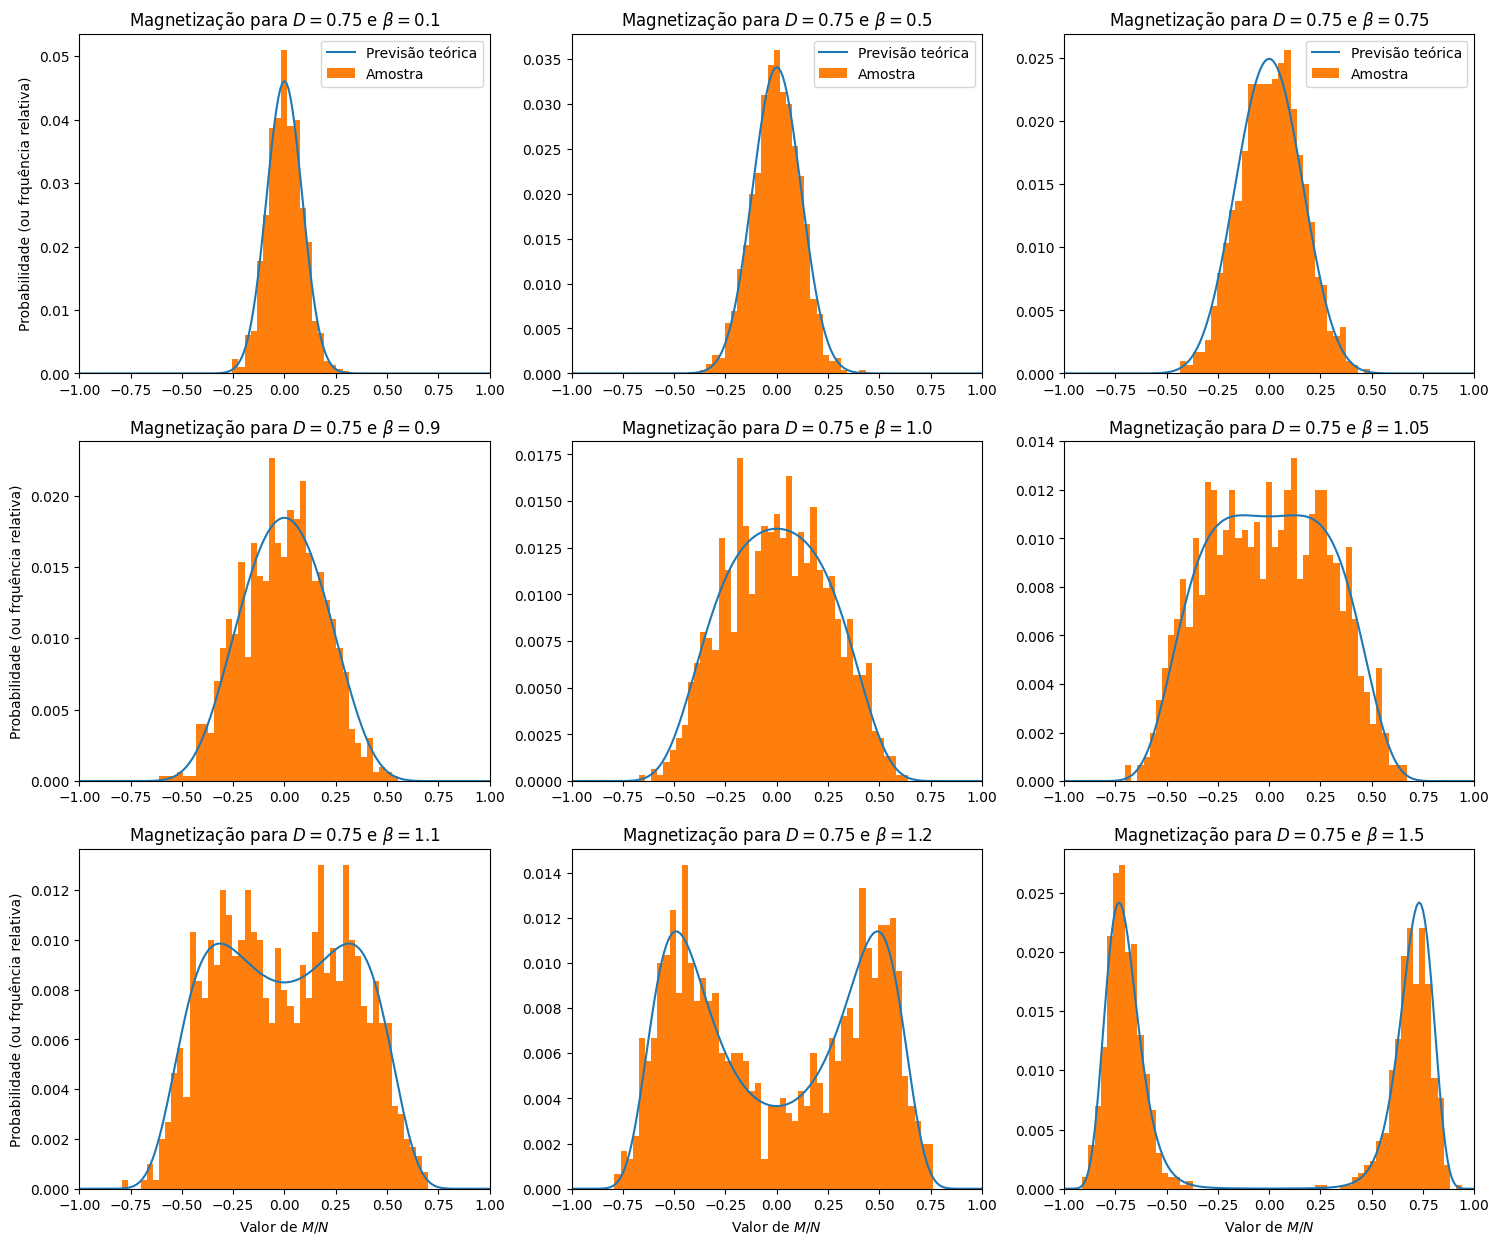

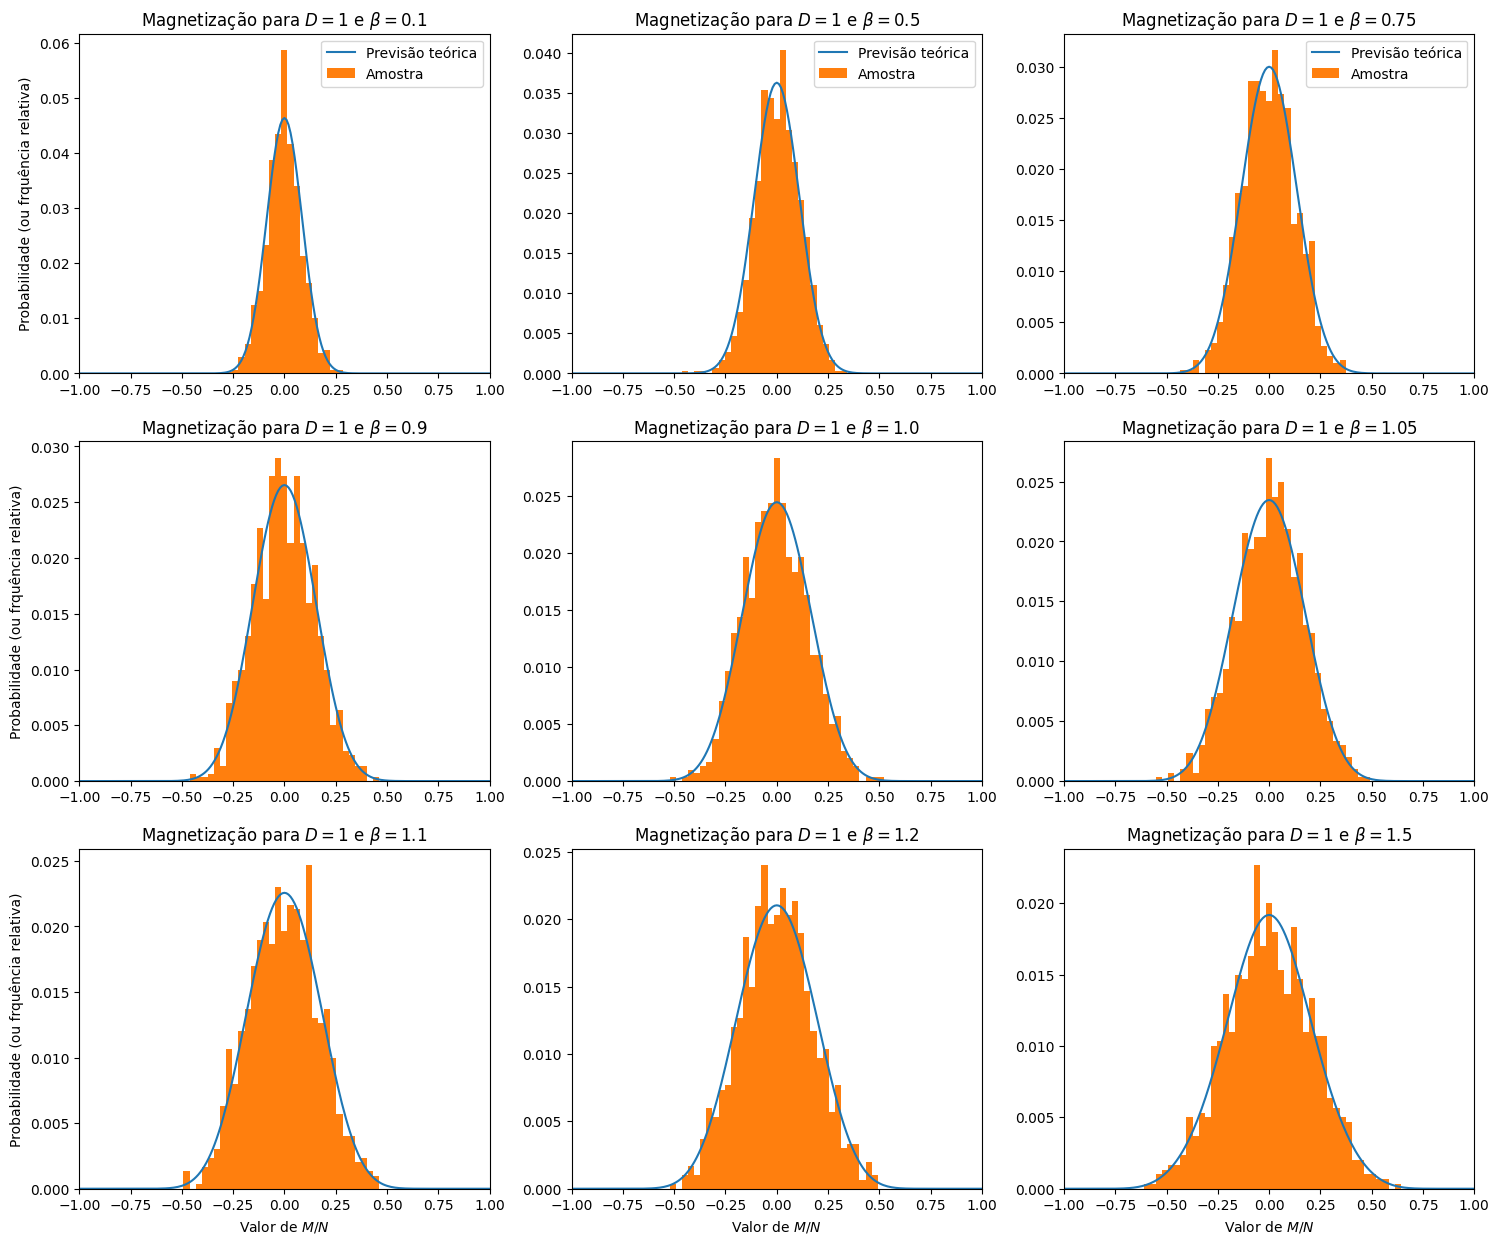

In [35]:
def neumanndisc(prob: np.ndarray, values: np.ndarray, N: int, safe=1.0001, maxiter=100) -> np.ndarray:
    """
        Gera `N` amostras de acordo com a função de probabilidade `prob` que está definida para eventos `values`.

        Multiplica o valor ideal de `M` por um fator de segurança `safe`.

        Faz no máximo `maxiter * N` iterações.
    """
    # Número de eventos diferentes
    L = len(prob)

    if L != len(values):
        raise ValueError("O tamanho da função de probabilidade é diferente do tamanho dos eventos!")

    # Valor da constante M = max(g/f) = max(L * g) com margem de erro
    # Dividimos por L aqui e de novo no cálculo da probabilidade de aceitação!
    M = max(prob) * safe


    # Fazer extrações
    res = np.empty(N)
    i = 0
    for _ in range(N * maxiter):
        # Gerar amostra da distribuição uniforme
        sample = int(np.floor(np.random.rand() * L))

        # Probabilidade de aceitação g(x) / M
        pa = prob[sample] / M

        # Aceitar a amostra
        if np.random.rand() < pa:
            res[i] = values[sample]
            i += 1
        else:
            pass
        
        # Já temos o número desejado de amostras
        if i == N:
            break
    else:
        raise TimeoutError("Número máximo de iterações excedido!!")
    
    return res


# Parâmetros (os restantes estão definidos no exercício anteior)
N = Ne
K = 1000
betae = 1.05

dados12a = dict()

# Pesos para calcular a frequência relativa
binnum = (2 * N + 1) // 3
freqrel = np.ones(K) / K / ((2 * N + 1)/binnum)

# Calcular para cada D
for D in [0, 0.25, 0.5, 0.75, 1]:
    # Função partição
    Z = np.zeros(len(bb12), dtype="float64")

    # Numerador da probabilidade
    numprob = np.zeros((len(bb12), 2 * N + 1), dtype="float64")

    # Guardar os dados
    dados12a[D] = dict()

    # Fazer o somatório para cada N0 e M
    for N0 in range(N+1):
        Mmax = N-N0
        N0fac = exactfactorial(N0)
        for M in range(-Mmax, Mmax + 1, 2):
            # Calcular omega, notando que deve ser sempre um inteiro!
            omega = Nfac // (exactfactorial(int((Mmax+M)/2)) * exactfactorial(int((Mmax-M)/2)) * N0fac)
    
            # Calcular para cada beta
            exp = np.exp(bb12 * (D * N0 + M**2/N - N/2))

            # Calcular o numerador e denominador da probabilidade (foi necessário especificar o tipo de dado do array, às vezes o tipo de dado era convertido para object)
            omegaexp = np.array(omega * exp, dtype=np.float64)
            numprob[:, M+N] += omegaexp
            Z += omegaexp
    
    # Calcular P(M)
    Z = Z[:, np.newaxis]
    prob = numprob / Z

        
    # Representar graficamente
    cols = 3
    rows = len(bb12) // cols + 1 * (len(bb12) % cols != 0)
    fig = plt.figure(figsize=(6 * cols, 5 * rows))


    # Gerar uma amostra para cada beta
    Mvalues = np.arange(-N, N+1)/N
    for index, beta in enumerate(bb12):
        # Gerar uma amostra
        probbeta = prob[index, :]
        amostra = neumanndisc(probbeta, Mvalues, K)
        
        # Valor médio obtido no 1.1
        metodo11 = dados11[D]
        media11 = sum(metodo11[1][bb11 == beta])

        
        # Plotar os dados
        plt.subplot(rows, cols, index+1)
        plt.plot(Mvalues, probbeta, label=f"Previsão teórica")
        plt.hist(amostra, label=f"Amostra", weights=freqrel, bins=binnum, range=(-1, 1))

        plt.title(f"Magnetização para $D = {D}$ e $\\beta = {beta}$")
        if index <= 2:
            plt.legend()
        if index >= 6:
            plt.xlabel("Valor de $M/N$")
        if index % 3 == 0:
            plt.ylabel("Probabilidade (ou frquência relativa)")

        ax = plt.gca()
        ax.set_xlim(-1, 1)

        dados12a[D][beta] = (probbeta, amostra)

    plt.show()

$\quad$(b) Meça a autocorrelação da magnetização para $\beta=1.05$,
\begin{align*}
corr_{M}(\tau)	& =\frac{\left\langle M_{i}M_{i+\tau}\right\rangle -\left\langle M_{i}\right\rangle ^{2}}{\left\langle M_{i}^{2}\right\rangle -\left\langle M_{i}\right\rangle ^{2}}\\
\left\langle M_{i}M_{i+\tau}\right\rangle &	=\frac{1}{L}\sum_{i=1}^{L}M_{i}M_{i+\tau}
\end{align*}

## Alínea 2 b)

Temos que $\lang M_i\rang$ é a média da amostra e $\lang M_i^2\rang - \lang M_i\rang^2$ é a sua variância.

Para o termo $\lang M_i M_{i+\tau}\rang$ usamos condições fronteira periódicas, isto é $M_{K+\tau} = M_\tau$. Usamos $K$ em vez de $L$ para manter a coerência com a notação anterior.

Com esta condição:
$$
\begin{align*}
corr_{M}\left(\frac K2 + \tau\right) &= \frac{\left\langle M_{i}M_{i+K/2+\tau}\right\rangle -\left\langle M_{i}\right\rangle ^{2}}{\left\langle M_{i}^{2}\right\rangle -\left\langle M_{i}\right\rangle ^{2}}\\[0.2cm]
&= \frac{\left\langle M_{i-K/2-\tau}M_{i}\right\rangle -\left\langle M_{i}\right\rangle ^{2}}{\left\langle M_{i}^{2}\right\rangle -\left\langle M_{i}\right\rangle ^{2}}
\\[0.2cm]
&= \frac{\left\langle M_{i+K/2-\tau}M_{i}\right\rangle -\left\langle M_{i}\right\rangle ^{2}}{\left\langle M_{i}^{2}\right\rangle -\left\langle M_{i}\right\rangle ^{2}}
\\[0.2cm]
&= corr_{M}\left(\frac K2 - \tau\right) 
\end{align*}
$$

Onde usamos o facto de, para qualquer inteiro $C$, devido às condições fronteira periódicas:
$$
\begin{align*}
\left\langle M_{i}M_{i+\tau}\right\rangle &= \left\langle M_{i+C}M_{i+\tau+C}\right\rangle
\end{align*}
$$

Devido a esta simetria, apenas nos interessa representar a autocorrelação até $\tau = K/2$.

## Análise dos Resultados
Vemos que o sinal não está autocorrelacionado. Este é o resultado esperado na medida que cada extração distribuição de probabilidade teórica é independente das restantes, logo não se espera nenhum tipo de correlação entre as amostras retiradas em primeiro lugar e as retiradas em seguida. 

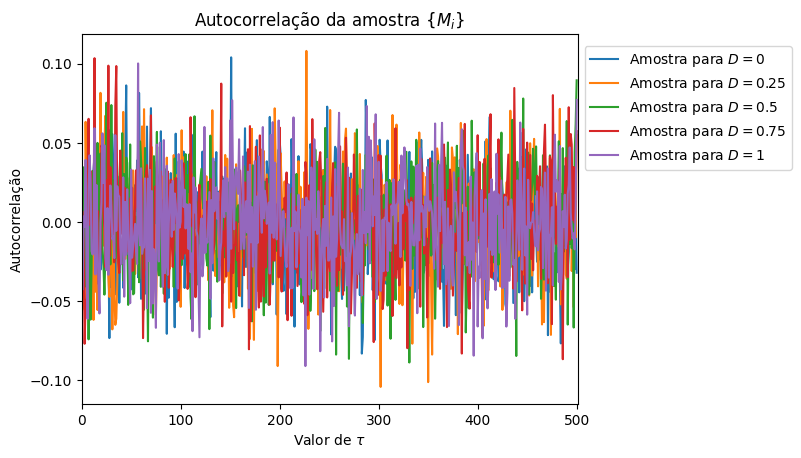

In [44]:
def autocorr(amostra: np.ndarray) -> np.ndarray:
    """
        Calcula a autocorrelação da amostra.
    """
    # Determinar K
    K = len(amostra)

    # Calcular a média e o desvio padrão
    med = np.mean(amostra)
    var = np.var(amostra)

    # Calcular a correlação
    corr = []
    for tau in range(0, K//2+1):
        MiMtau = np.sum(amostra * np.concatenate((amostra[tau:], amostra[:tau]))) / K
        corr += [(MiMtau - med**2) / var]
    
    return corr




# Parâmetros (os restantes estão definidos nas alíneas anteriores)
beta = betae
K = len(dados12a[D][betae][1])


# Calcular para cada D
for D in [0, 0.25, 0.5, 0.75, 1]:
    # Reaver os dados
    prob, amostra = dados12a[D][betae]

    # Calcular a autocorrelação
    corr = autocorr(amostra)
    
    # Representar graficamente
    plt.plot(range(1, K//2+1), corr[1:], label=f"Amostra para $D = {D}$")

plt.title("Autocorrelação da amostra $\\{M_i\\}$")
plt.xlabel("Valor de $\\tau$")
plt.ylabel("Autocorrelação")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

ax = plt.gca()
ax.set_xlim(0, K//2+1)

plt.show()

## Pergunta 2

Na pergunta anterior efectuamos uma simulação Monte Carlo gerando as amostras da variável $M$. Será que a amostra gerada corresponde à gerada por uma dinâmica do sistema de N spins com o Hamiltoniano, 
\begin{equation*}
H=\frac{N^{2}-M^{2}}{N}+D(N-N_{0})
\end{equation*}
e com o algorítmo de Metropolis?

1. Para testar implemente o algoritmo de Metropolis para $N$ spins:

• Atribua a cada um dos $N$ spins do sistema uma variável $\pm1,0$ com probailidade uniforme.

• Considere um passo de tempo o seguinte algoritmo:

– Escolha um spin com probabilidade uniforme.

– Proponha alterar o seu valor e aceite com a probabilidade $\min\left(1,e^{-\beta\Delta H}\right)$ senão fique no mesmo estado.

## Alínea 1

Temos que:
$$
\begin{align*}
-\beta\Delta H &= \beta(H - H')
\\[0.2cm]
&= \beta\left(-DN_0 - \frac{M^2}{N} + DN_0' + \frac{(M')^2}{N}\right)
\\[0.2cm]
&= \beta\left(D(N_0'-N_0) + \frac{(M')^2-M^2}{N}\right)
\end{align*}
$$

In [37]:
def IsingMarkov(N: int, t: int, beta: float, D: float, state: np.ndarray) -> np.ndarray:
    """
        Simula `N` spins que podem estar no estado -1, 0, +1 de acordo com o modelo de Ising.

        Utiliza o algoritmo de Metropolis com probabilidade de seleção uniforme para o spin (e para o seu novo valor) e probabilidade de aceitação dada pela distribuição de Boltzmann.

        Utiliza como estado inicial `state`.

        Devolve uma matriz `ss` onde `ss[i, j]` corresponde ao spin da partícula `i` no instante de tempo `j`.
    """
    # Estado inicial
    M = sum(state)

    # Dar t passos
    ss = np.zeros((N, t+1))
    ss[:, 0] = state.copy()
    for k in range(t):
        # Escolhe o spin a alterar
        pos = np.random.randint(0, N)

        # Novo spin, -1/ 0/ 1 com igual probabilidade
        Snovo = np.random.randint(-1, 2)

        # O spin mantém-se
        if state[pos] == Snovo:
            ss[:, k+1] = state.copy()
            continue

        # Probabilidade de aceitação (não precisamos de fazer o mínimo com 1 pois se pa > 1 então o novo valor será aceite, que é o mesmo comportamento que temos para pa = 1)
        deltaN0 = - (1 if state[pos] == 0 else 0) + (1 if Snovo == 0 else 0)
        Mnovo = M - state[pos] + Snovo
        pa = np.exp(beta * (D * deltaN0 + (Mnovo**2 - M**2)/N))

        # Aceitar o passo?
        aceitar = np.random.random() < pa

        # Mudar o spin
        if aceitar:
            state[pos] = Snovo
            M = Mnovo

        # Guardar o novo estado
        ss[:, k+1] = state.copy()
    
    # Devolver o caminho gerado
    return ss

2. Compare as distribuições de probabilidade assiptótica da magnetização para vários valores de $\beta$ e $D$.  

## Alínea 2

Temos que:
$$
\begin{align*}
-\beta\Delta H &= \beta(H - H')
\\[0.2cm]
&= \beta\left(-DN_0 - \frac{M^2}{N} + DN_0' + \frac{(M')^2}{N}\right)
\\[0.2cm]
&= \beta\left(D(N_0'-N_0) + \frac{(M')^2-M^2}{N}\right)
\end{align*}
$$

## Análise de Resultados
Vemos que o valor obtido para a magnetização é bem descrito pela previsão teórica feita no exercício 1.

Como se representou as magnetizações dos diferentes estados (gerados de forma aleatória e independente) ao longo do tempo podemos ver a evolução do sistema para o estado estacionário previsto teoricamente!

Representando a evolução temporal da energia do sistema, percebemos também que $t \ge 3000$ é suficiente para o estado estacionário ser atingido.

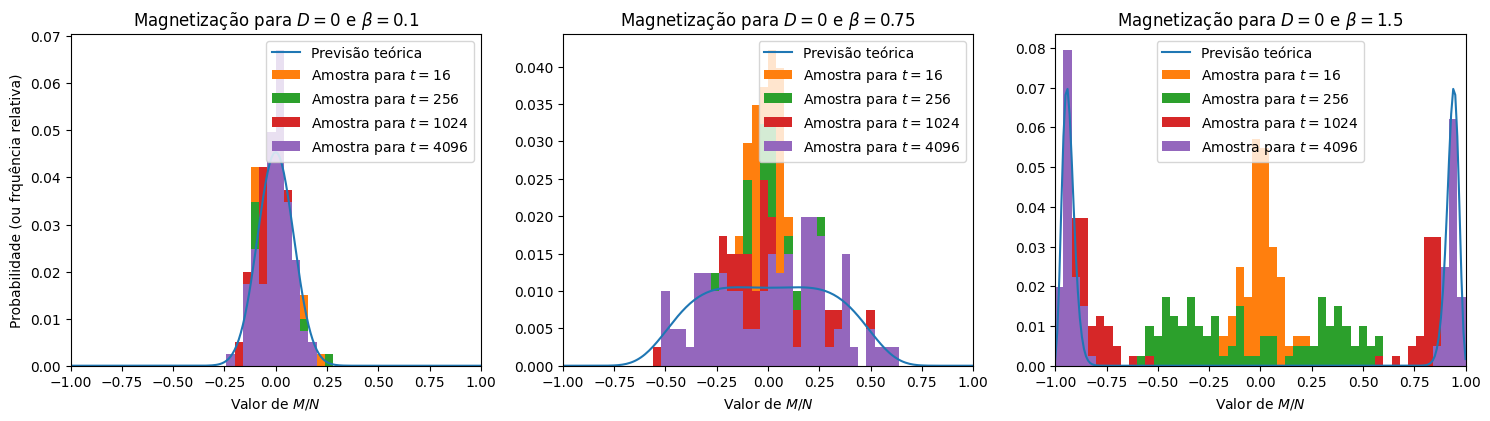

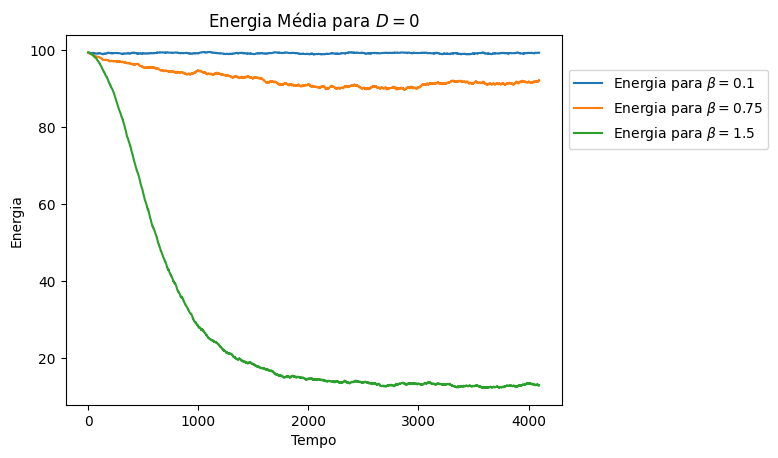

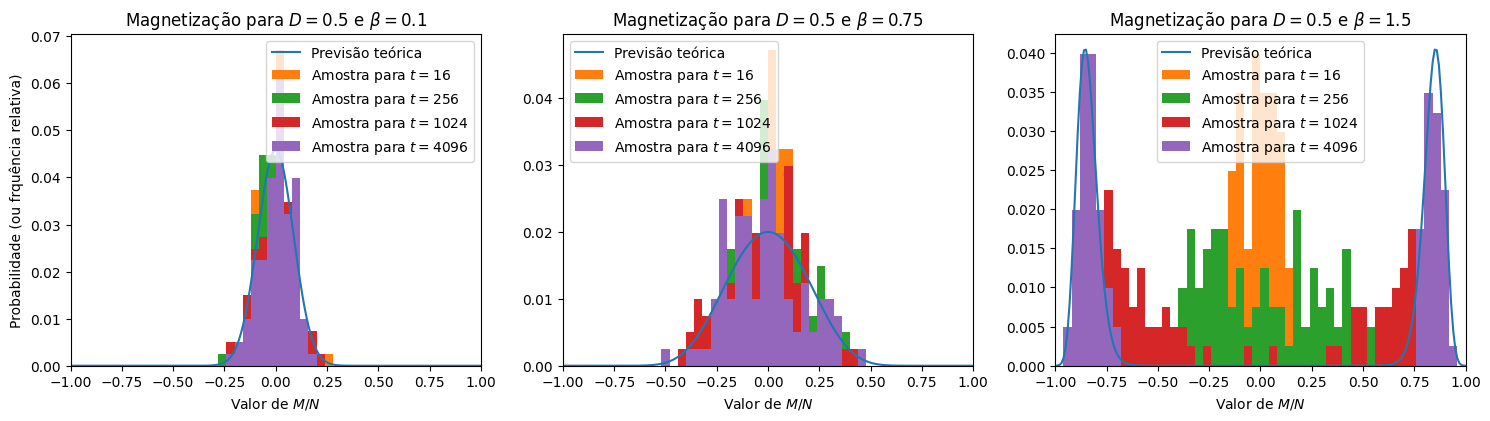

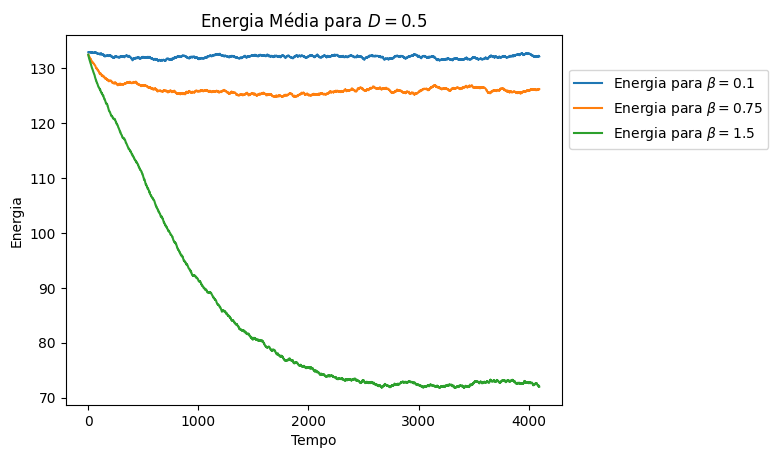

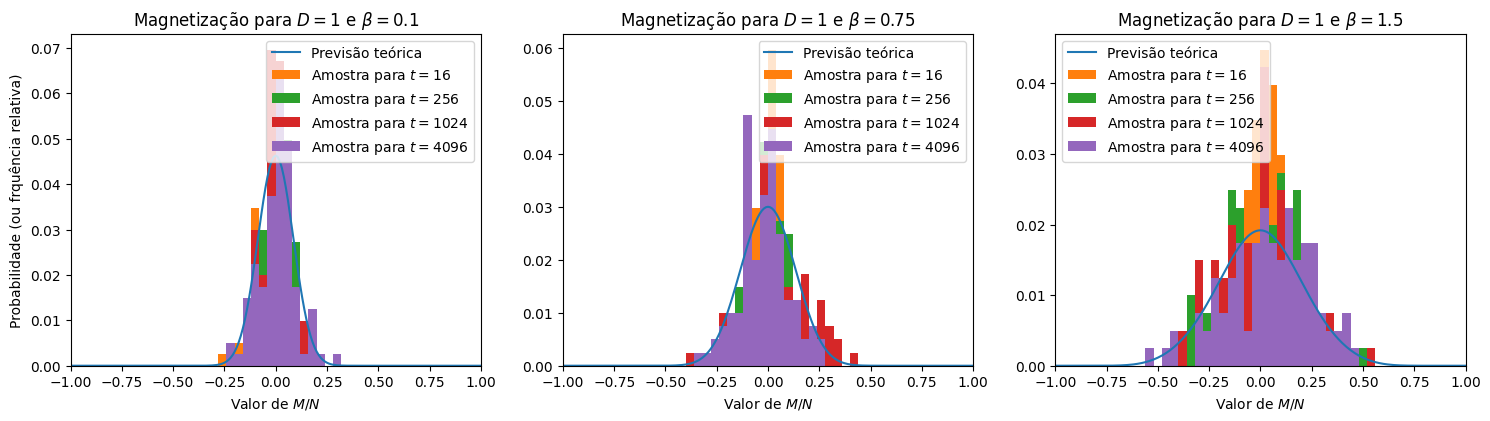

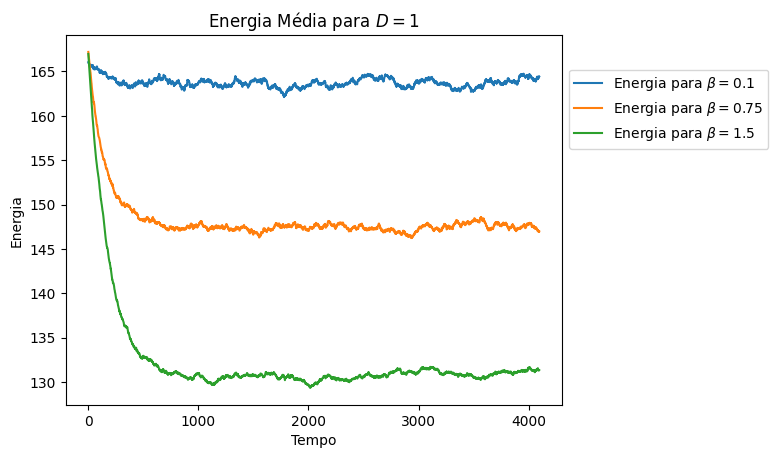

In [38]:
# Parâmetros
N = Ne
K = 100
bb2 = np.array([0.1, 0.75, 1.5])
tt2 = np.array([2**4, 2**8, 2**10, 2**12])


# Pesos para calcular a frequência relativa
binnum = (2 * N + 1) // 4
freqrel = np.ones(K) / K / ((2 * N + 1)/binnum)


Mvalues = np.arange(-N, N+1)/N
for D in [0, 0.5, 1]:
    cols = 3
    rows = 5
    fig = plt.figure(figsize=(6 * cols, 5 * rows))
    
    energias = []
    for index, beta in enumerate(bb2):
        plt.subplot(rows, cols, index+1)
            
        # Recuperar os dados já calculados
        prob = dados12a[D][beta][0]
        plt.plot(Mvalues, prob, label=f"Previsão teórica")
        plt.title(f"Magnetização para $D = {D}$ e $\\beta = {beta}$")
        plt.xlabel("Valor de $M/N$")

        if index == 0:
            plt.ylabel("Probabilidade (ou frquência relativa)")
        
        
        amostra = [[] for _ in tt2]

        etotal = np.zeros(tt2[-1]+1)
        for _ in range(K): 
            state = np.random.randint(-1, 2, Ne)
            # state[0:50] = 1 # podemos ver que de facto neste caso para beta elevado em todas as simulações o sistema fica com magnetização positiva

            ss = IsingMarkov(N, tt2[-1], beta, D, state.copy())

            for index, t in enumerate(tt2):
                amostra[index] += [np.sum(ss[:, t])/N]
            
            # Guardar a evolução temporal da energia média
            etotal += (N**2 - np.sum(ss, axis=0)**2)/N + D * (N - np.sum(ss == 0, axis=0))
        
        energias += [etotal/K]

        # Plotar os dados
        for index, t in enumerate(tt2):
            plt.hist(amostra[index], label=f"Amostra para $t = {t}$", weights=freqrel, bins=binnum, range=(-1, 1))
        
        plt.legend()

        ax = plt.gca()
        ax.set_xlim(-1, 1)

    plt.show()

    # Representar a evolução temporal da energia média
    for index, beta in enumerate(bb2):
        plt.plot(range(tt2[-1]+1), energias[index], label=f"Energia para $\\beta = {beta}$")
    
    plt.title(f"Energia Média para $D = {D}$")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
    plt.xlabel("Tempo")
    plt.ylabel("Energia")
    plt.show()

3. Os amostras geradas são equivalentes às do primeiro problema?

## Alínea 3

Podemos gerar amostras da magnetização do sistema a partir do algoritmo de Metropolis de vários modos:
1. Gerar vários estados iniciais e evoluí-los de forma independente. Neste caso devemos ter valores para a magnetização não correlacionados, uma vez que cada valor foi obtido de forma independente.
2. Gerar um estado inicial e evoluí-lo, medindo a sua magnetização em pontos sucessivos do tempo para $t$ suficientemente maior que o tempo necessário para o sistema atingir o estado assintótico.

## Análise de Resultados
Temos que:
1. Como esperado, o sinal não tem nenhuma autocorrelação significativa.
2. Agora vemos que o sinal está correlacionado consigo mesmo, sendo que o valor da autocorrelação oscila em torno de $0$. Por vezes vemos também elevada autocorrelação negativa para $D$ menor, o que pode corresponder a uma troca do sinal da magnetização de um ponto de equilíbrio para o ponto com sinal oposto.

Método 1


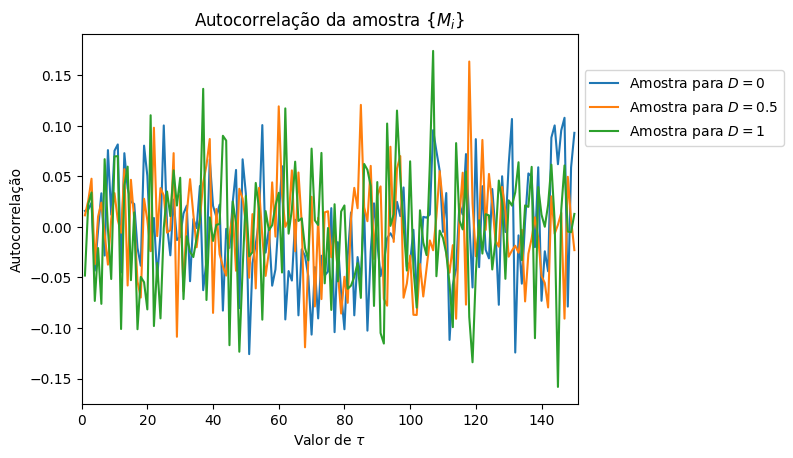

Método 2


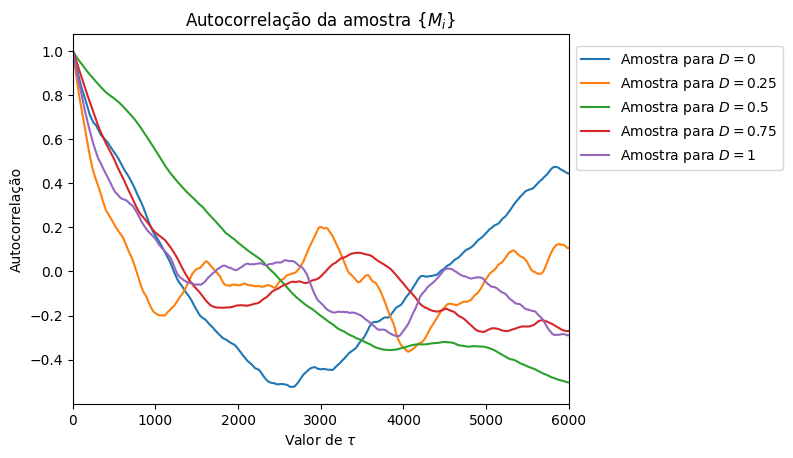

In [48]:
# Parâmetros (os restantes estão definidos nas alíneas anteriores)
K = 300
N = Ne
beta = betae


print("Método 1")

# Calcular para cada D
for D in [0, 0.5, 1]:
    amostra = []

    for _ in range(K): 
        state = np.random.randint(-1, 2, Ne)

        ss = IsingMarkov(N, tt2[-1], beta, D, state.copy())
        amostra += [np.sum(ss[:, -1])/N]

    # Calcular a autocorrelação
    corr = autocorr(amostra)
    
    # Representar graficamente
    plt.plot(range(1, K//2+1), corr[1:], label=f"Amostra para $D = {D}$")

plt.title("Autocorrelação da amostra $\\{M_i\\}$")
plt.xlabel("Valor de $\\tau$")
plt.ylabel("Autocorrelação")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

ax = plt.gca()
ax.set_xlim(0, K//2+1)

plt.show()


# Aumentar K
K = 12000

print("Método 2")

# Calcular para cada D
for D in [0, 0.25, 0.5, 0.75, 1]:
    amostra = []

    # Evoluir um estado
    state = np.random.randint(-1, 2, Ne)

    ss = IsingMarkov(N, tt2[-1]+K-1, beta, D, state.copy())
    amostra = np.sum(ss[:, tt2[-1]:], axis=0)/N

    # Calcular a autocorrelação
    corr = autocorr(amostra)
    
    # Representar graficamente
    plt.plot(range(K//2+1), corr, label=f"Amostra para $D = {D}$")

plt.title("Autocorrelação da amostra $\\{M_i\\}$")
plt.xlabel("Valor de $\\tau$")
plt.ylabel("Autocorrelação")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

ax = plt.gca()
ax.set_xlim(0, K//2+1)

plt.show()

### Bom Trabalho